In [1]:
#En un notebook desarrolle un modelo o modelos que permita predecir el nivel de presión sonora a escala en decibelios. 
#En cada caso debe colocar la forma en la que se recuperan los datos, análisis exploratorio de los datos, transformación 
#de datos si fuera el caso, selección del conjunto de entrenamiento y prueba, evaluación del modelo o modelos 
#desarrollados y conclusión sobre el mejor modelo elegido

In [2]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Recuperación de datos

In [3]:
#datos=pd.read_csv('airfoil_self_noise.dat')
columnas = ['Frecuencia',
           'AnguloDeAtaque',
           'LongitudDeLaCuerda',
           'VelocidadDeFlujoLibre',
           'EspesorDeDesplazamiento',
           'NivelDePresion']

datos = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=columnas)

In [4]:
datos.head()

,Frecuencia,AnguloDeAtaque,LongitudDeLaCuerda,VelocidadDeFlujoLibre,EspesorDeDesplazamiento,NivelDePresion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
datos.tail()

,Frecuencia,AnguloDeAtaque,LongitudDeLaCuerda,VelocidadDeFlujoLibre,EspesorDeDesplazamiento,NivelDePresion
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [6]:
type(datos)

pandas.core.frame.DataFrame

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Frecuencia               1503 non-null   int64  
 1   AnguloDeAtaque           1503 non-null   float64
 2   LongitudDeLaCuerda       1503 non-null   float64
 3   VelocidadDeFlujoLibre    1503 non-null   float64
 4   EspesorDeDesplazamiento  1503 non-null   float64
 5   NivelDePresion           1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [8]:
datos.describe()

,Frecuencia,AnguloDeAtaque,LongitudDeLaCuerda,VelocidadDeFlujoLibre,EspesorDeDesplazamiento,NivelDePresion
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [9]:
datos.columns

Index(['Frecuencia', 'AnguloDeAtaque', 'LongitudDeLaCuerda',
       'VelocidadDeFlujoLibre', 'EspesorDeDesplazamiento', 'NivelDePresion'],
      dtype='object')

## Análisis de Datos Exploratorio

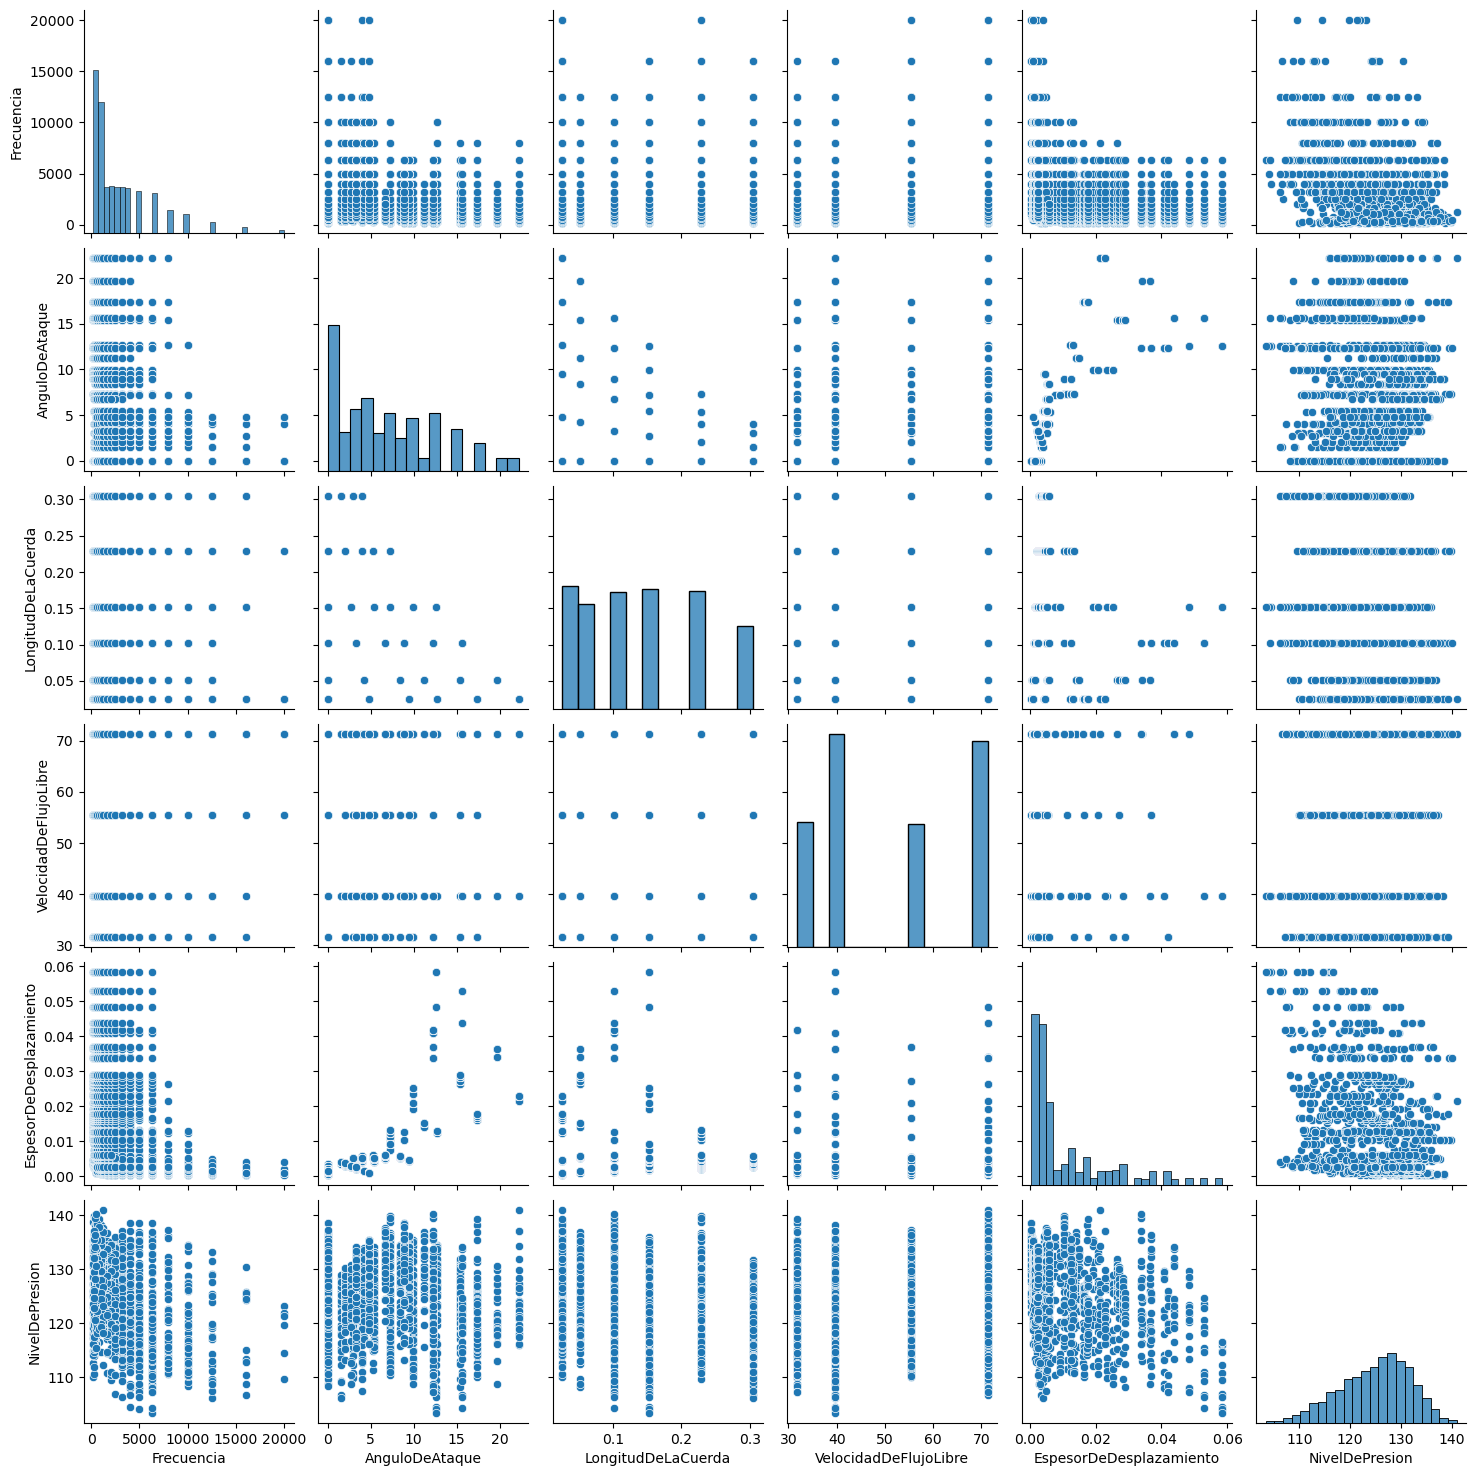

In [10]:
sns.pairplot(datos)

In [11]:
sns.displot(datos['NivelDePresion'])

In [12]:
sns.histplot(datos['NivelDePresion'],bins=30)

<AxesSubplot:xlabel='NivelDePresion', ylabel='Count'>

In [13]:
datos.corr()

,Frecuencia,AnguloDeAtaque,LongitudDeLaCuerda,VelocidadDeFlujoLibre,EspesorDeDesplazamiento,NivelDePresion
Frecuencia,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AnguloDeAtaque,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
LongitudDeLaCuerda,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
VelocidadDeFlujoLibre,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
EspesorDeDesplazamiento,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
NivelDePresion,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [14]:
sns.heatmap(datos.corr(),annot=True)

<AxesSubplot:>

In [ ]:
# Entrenando el modelo de regresion lineal